In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
from collections import Counter


  Artist_x                        Title  Danceability  Energy  Acousticness  \
0     Joji                          Run         0.427   0.715       0.04690   
1   Eminem  Godzilla (feat. Juice WRLD)         0.808   0.745       0.14500   
2   Eminem                Lose Yourself         0.692   0.744       0.00868   
3   Eminem                  Mockingbird         0.637   0.678       0.20900   
4    Logic      Homicide (feat. Eminem)         0.694   0.759       0.13700   

   Instrumentalness    Tempo Artist_y        genre  Artist  \
0          0.000231  157.905     Joji  Alternative    Joji   
1          0.000000  165.995   Eminem      Hip-Hop  Eminem   
2          0.000423  171.374   Eminem  Alternative  Eminem   
3          0.000000   84.039   Eminem      Hip-Hop  Eminem   
4          0.000000  140.055    Logic      Hip-Hop   Logic   

                                              Lyrics  Sentiment_Positivity  \
0  Paroles de la chanson Run par Joji\r\nI fell f...                 0.262

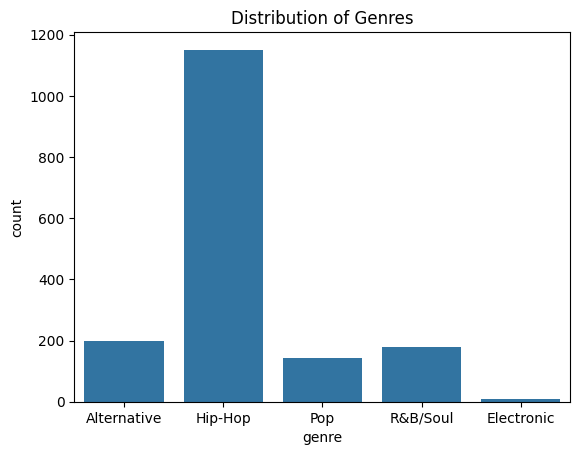

In [22]:
data = pd.read_csv("ultimate.csv") 
print(data.head())

print(data.isnull().sum())

sns.countplot(x='genre', data=data)
plt.title('Distribution of Genres')
plt.show()

In [23]:
print(data.columns)


Index(['Artist_x', 'Title', 'Danceability', 'Energy', 'Acousticness',
       'Instrumentalness', 'Tempo', 'Artist_y', 'genre', 'Artist', 'Lyrics',
       'Sentiment_Positivity', 'Sentiment_Negativity', 'Sentiment_Neutrality',
       'Sentiment_Compound'],
      dtype='object')


In [24]:

# Separate features (X) and target variable (y)
X = data[['Danceability', 'Energy', 'Acousticness', 'Instrumentalness', 'Tempo']]
y = data['genre']

# Convert features to numeric type using .loc
X.loc[:, 'Danceability'] = pd.to_numeric(X['Danceability'], errors='coerce')
X.loc[:, 'Energy'] = pd.to_numeric(X['Energy'], errors='coerce')
X.loc[:, 'Acousticness'] = pd.to_numeric(X['Acousticness'], errors='coerce')
X.loc[:, 'Instrumentalness'] = pd.to_numeric(X['Instrumentalness'], errors='coerce')
X.loc[:, 'Tempo'] = pd.to_numeric(X['Tempo'], errors='coerce')

# Drop rows with NaN values (if any)
X = X.dropna()

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution after SMOTE: Counter({'Alternative': 1151, 'Hip-Hop': 1151, 'Pop': 1151, 'R&B/Soul': 1151, 'Electronic': 1151})


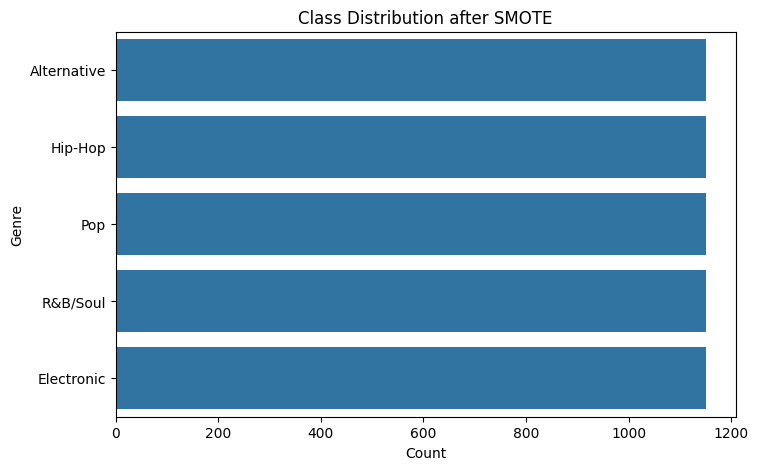

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(y=y_resampled)
plt.title('Class Distribution after SMOTE')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [26]:

# Number of samples in the resampled dataset
num_samples_resampled = X_resampled.shape[0]

# Number of features in the resampled dataset
num_features_resampled = X_resampled.shape[1]

# Distribution of classes in the resampled dataset
class_distribution_resampled = Counter(y_resampled)

print("Number of samples in the resampled dataset:", num_samples_resampled)
print("Number of features in the resampled dataset:", num_features_resampled)
print("\nDistribution of classes in the resampled dataset:")
print(class_distribution_resampled)

Number of samples in the resampled dataset: 5755
Number of features in the resampled dataset: 5

Distribution of classes in the resampled dataset:
Counter({'Alternative': 1151, 'Hip-Hop': 1151, 'Pop': 1151, 'R&B/Soul': 1151, 'Electronic': 1151})


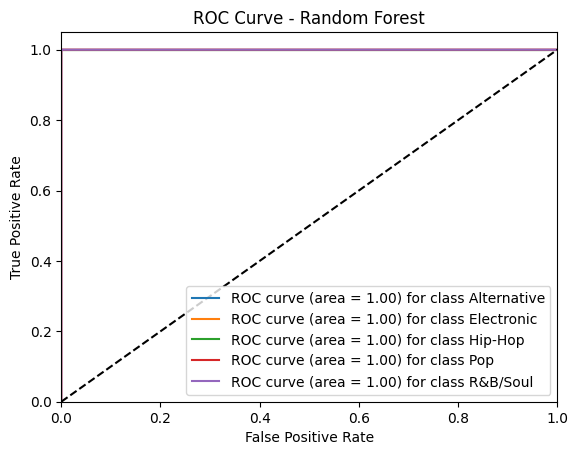

Classifier: Random Forest
Accuracy: 0.9998262380538662
F1 Score: 0.9998262380210761



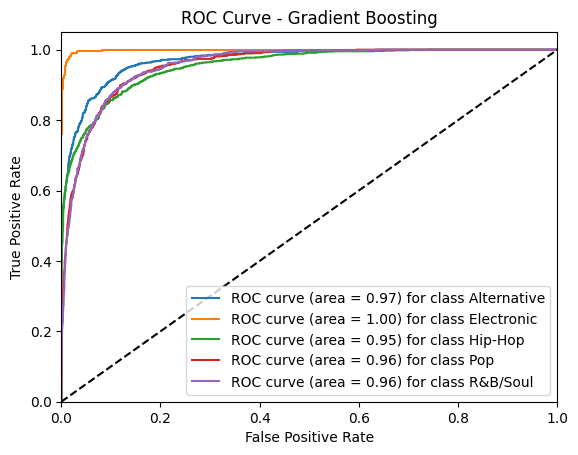

Classifier: Gradient Boosting
Accuracy: 0.8151172893136404
F1 Score: 0.8144323373551403



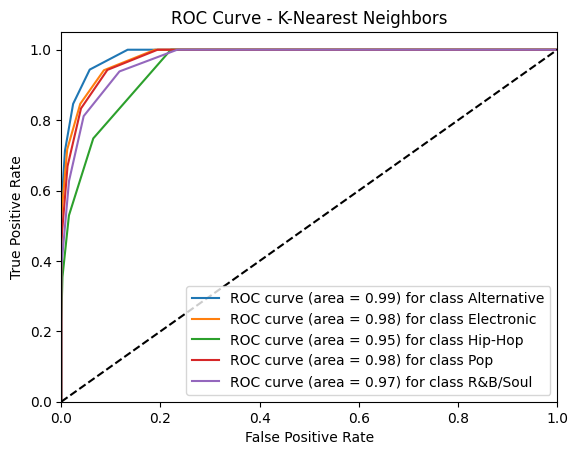

Classifier: K-Nearest Neighbors
Accuracy: 0.8144222415291051
F1 Score: 0.8102210152035787



In [27]:



# Instantiate the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_resampled, y_resampled)
    
    # Predict the classes
    y_pred = clf.predict(X_resampled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_resampled, y_pred)
    
    # Calculate F1 score
    f1 = f1_score(y_resampled, y_pred, average='weighted')
    
    # Calculate probabilities for ROC curve (only for classifiers supporting probability estimates)
    if hasattr(clf, 'predict_proba'):
        y_prob = clf.predict_proba(X_resampled)
        # Calculate ROC curve and AUC score for each class separately (OvR strategy)
        fpr = dict()
        tpr = dict()
        auc = dict()
        for i in range(len(clf.classes_)):
            fpr[i], tpr[i], _ = roc_curve(y_resampled == clf.classes_[i], y_prob[:, i])
            auc[i] = roc_auc_score(y_resampled == clf.classes_[i], y_prob[:, i])
        
        # Plot ROC curve for each class
        plt.figure()
        for i in range(len(clf.classes_)):
            plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %s' % (auc[i], clf.classes_[i]))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve - ' + name)
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("ROC curve and AUC score are not available for", name)
    
    # Print results
    print("Classifier:", name)
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print()



In [28]:


classifier = RandomForestClassifier() 

cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.79930495 0.83318853 0.83840139 0.86967854 0.87402259]
Mean CV Accuracy: 0.8429192006950478


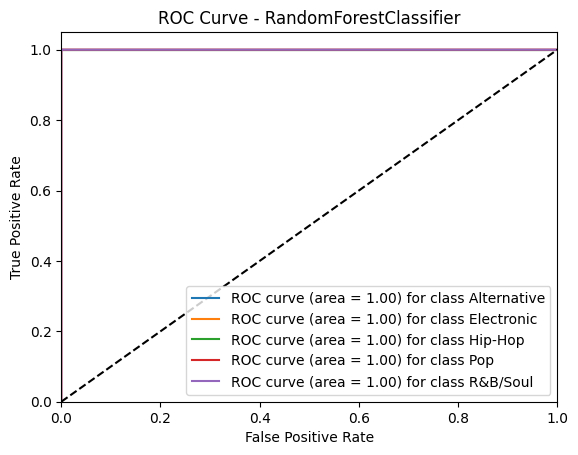

Classifier: RandomForestClassifier
Accuracy: 0.9998262380538662
F1 Score: 0.9998262380210761


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Instantiate the RandomForestClassifier
classifier = RandomForestClassifier()

# Train the classifier
classifier.fit(X_resampled, y_resampled)

# Predict the classes
y_pred = classifier.predict(X_resampled)

# Calculate accuracy
accuracy = accuracy_score(y_resampled, y_pred)

# Calculate F1 score
f1 = f1_score(y_resampled, y_pred, average='weighted')

# Calculate probabilities for ROC curve
if hasattr(classifier, 'predict_proba'):
    y_prob = classifier.predict_proba(X_resampled)
    # Calculate ROC curve and AUC score for each class separately (OvR strategy)
    fpr = dict()
    tpr = dict()
    auc = dict()
    for i in range(len(classifier.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_resampled == classifier.classes_[i], y_prob[:, i])
        auc[i] = roc_auc_score(y_resampled == classifier.classes_[i], y_prob[:, i])

    # Plot ROC curve for each class
    plt.figure()
    for i in range(len(classifier.classes_)):
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %s' % (auc[i], classifier.classes_[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - RandomForestClassifier')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve and AUC score are not available for RandomForestClassifier")

# Print results
print("Classifier: RandomForestClassifier")
print("Accuracy:", accuracy)
print("F1 Score:", f1)


In [36]:
import pickle
classifier = RandomForestClassifier()
classifier.fit(X_resampled, y_resampled)

# Save the trained classifier to a pickle file
with open("random_forest_classifier1.pkl", "wb") as f:
    pickle.dump(classifier, f)

In [52]:
with open("random_forest_classifier1.pkl", "rb") as f:
    loaded_classifier = pickle.load(f)
new_data_point = [[0.7, 0.8, 0.2, 0.1, 110.0]]
prediction = loaded_classifier.predict(new_data_point)
print(prediction)

['Pop']


C:\Users\itsre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import pickle

# Define the parameter grid for Gradient Boosting Classifier
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4]
}

# Instantiate the GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier()

# Perform GridSearchCV to find the best parameters
grid_search_gb = GridSearchCV(gradient_boosting_classifier, param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_resampled, y_resampled)

# Get the best parameters and the best estimator
best_params_gb = grid_search_gb.best_params_
best_estimator_gb = grid_search_gb.best_estimator_

# Train the best estimator
best_estimator_gb.fit(X_resampled, y_resampled)

# Save the trained model to a pickle file
with open('gradient_boosting_classifier_best.pkl', 'wb') as f:
    pickle.dump(best_estimator_gb, f)


In [51]:
with open("gradient_boosting_classifier_best.pkl", "rb") as f:
    loaded_classifier = pickle.load(f)
new_data_point = [[0.7, 0.8, 0.2, 0.1, 110.0]]
prediction = loaded_classifier.predict(new_data_point)
print(prediction)

['Alternative']


C:\Users\itsre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import pickle

# Define the parameter grid for K-Nearest Neighbors Classifier
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Instantiate the KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Perform GridSearchCV to find the best parameters
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_resampled, y_resampled)

# Get the best parameters and the best estimator
best_params_knn = grid_search_knn.best_params_
best_estimator_knn = grid_search_knn.best_estimator_

# Train the best estimator
best_estimator_knn.fit(X_resampled, y_resampled)

# Save the trained model to a pickle file
with open('knn_classifier_best.pkl', 'wb') as f:
    pickle.dump(best_estimator_knn, f)
